In [61]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [62]:
toprepo=pd.read_csv('../../data(too large)/topRepositoriesContents.csv', sep=",")

## Data Info

In [63]:
toprepo.head(3)

,owner,repo,fileData(name.size),numFiles,time
0,Alexander-MacDonald,test-repo,[('https://api.github.com/repos/Alexander-MacD...,5,2207.161188
1,twbs,bootstrap,[('https://api.github.com/repos/twbs/bootstrap...,745,83008.044720
2,EbookFoundation,free-programming-books,[('https://api.github.com/repos/EbookFoundatio...,210,7441.006660


In [64]:
toprepo.shape

(978, 5)

In [65]:
toprepo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   owner                978 non-null    object 
 1   repo                 978 non-null    object 
 2   fileData(name.size)  978 non-null    object 
 3   numFiles             978 non-null    int64  
 4   time                 978 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.3+ KB


In [66]:
toprepo.isnull().sum()

owner                  0
repo                   0
fileData(name.size)    0
numFiles               0
time                   0
dtype: int64

###  Unique data

In [67]:
#'Commits Unique values
unique_value_counts = toprepo.nunique()
print(unique_value_counts)

owner                  813
repo                   971
fileData(name.size)    971
numFiles               617
time                   978
dtype: int64


## Data Cleaning 

In [68]:
toprepo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   owner                978 non-null    object 
 1   repo                 978 non-null    object 
 2   fileData(name.size)  978 non-null    object 
 3   numFiles             978 non-null    int64  
 4   time                 978 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.3+ KB


In [69]:
toprepo = toprepo.rename(columns={'fileData(name.size)': 'link'})

In [70]:
temp  = toprepo[:100]

In [71]:
temp = temp.explode('link')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   owner     100 non-null    object 
 1   repo      100 non-null    object 
 2   link      100 non-null    object 
 3   numFiles  100 non-null    int64  
 4   time      100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [84]:
toprepo

,owner,repo,link,numFiles,time
0,Alexander-MacDonald,test-repo,[('https://api.github.com/repos/Alexander-MacD...,5,2207.161188
1,twbs,bootstrap,[('https://api.github.com/repos/twbs/bootstrap...,745,83008.044720
2,EbookFoundation,free-programming-books,[('https://api.github.com/repos/EbookFoundatio...,210,7441.006660
3,facebook,react,[('https://api.github.com/repos/facebook/react...,2575,332342.858076
4,d3,d3,[('https://api.github.com/repos/d3/d3/contents...,173,19827.651978
...,...,...,...,...,...
973,chrisjenx,Calligraphy,[('https://api.github.com/repos/chrisjenx/Call...,60,16373.378515
974,eliangcs,http-prompt,[('https://api.github.com/repos/eliangcs/http-...,55,5973.908424
975,robertdavidgraham,masscan,[('https://api.github.com/repos/robertdavidgra...,249,7085.832357
976,ElemeFE,mint-ui,[('https://api.github.com/repos/ElemeFE/mint-u...,240,42161.152601


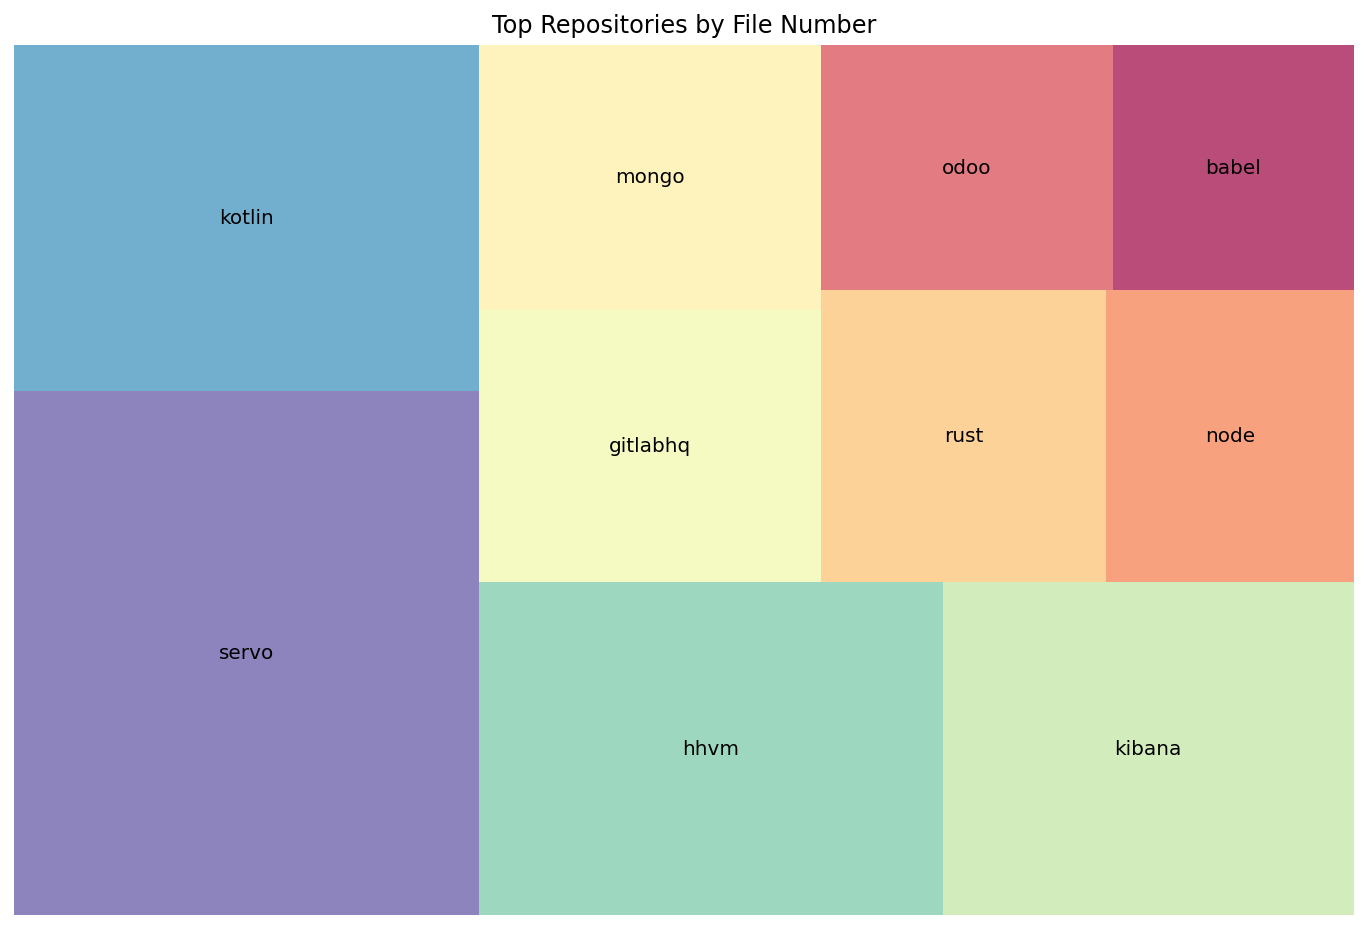

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


top_repo_df = toprepo.sort_values(by='numFiles', ascending=False).head(10)  


colors = plt.cm.Spectral_r(np.linspace(0, 1, len(top_repo_df)))
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_repo_df["numFiles"], label=top_repo_df["repo"], color=colors, alpha=0.7)
plt.title('Top Repositories by File Number')
plt.axis('off')
plt.show()


In [86]:
toprepo

,owner,repo,link,numFiles,time
0,Alexander-MacDonald,test-repo,[('https://api.github.com/repos/Alexander-MacD...,5,2207.161188
1,twbs,bootstrap,[('https://api.github.com/repos/twbs/bootstrap...,745,83008.044720
2,EbookFoundation,free-programming-books,[('https://api.github.com/repos/EbookFoundatio...,210,7441.006660
3,facebook,react,[('https://api.github.com/repos/facebook/react...,2575,332342.858076
4,d3,d3,[('https://api.github.com/repos/d3/d3/contents...,173,19827.651978
...,...,...,...,...,...
973,chrisjenx,Calligraphy,[('https://api.github.com/repos/chrisjenx/Call...,60,16373.378515
974,eliangcs,http-prompt,[('https://api.github.com/repos/eliangcs/http-...,55,5973.908424
975,robertdavidgraham,masscan,[('https://api.github.com/repos/robertdavidgra...,249,7085.832357
976,ElemeFE,mint-ui,[('https://api.github.com/repos/ElemeFE/mint-u...,240,42161.152601


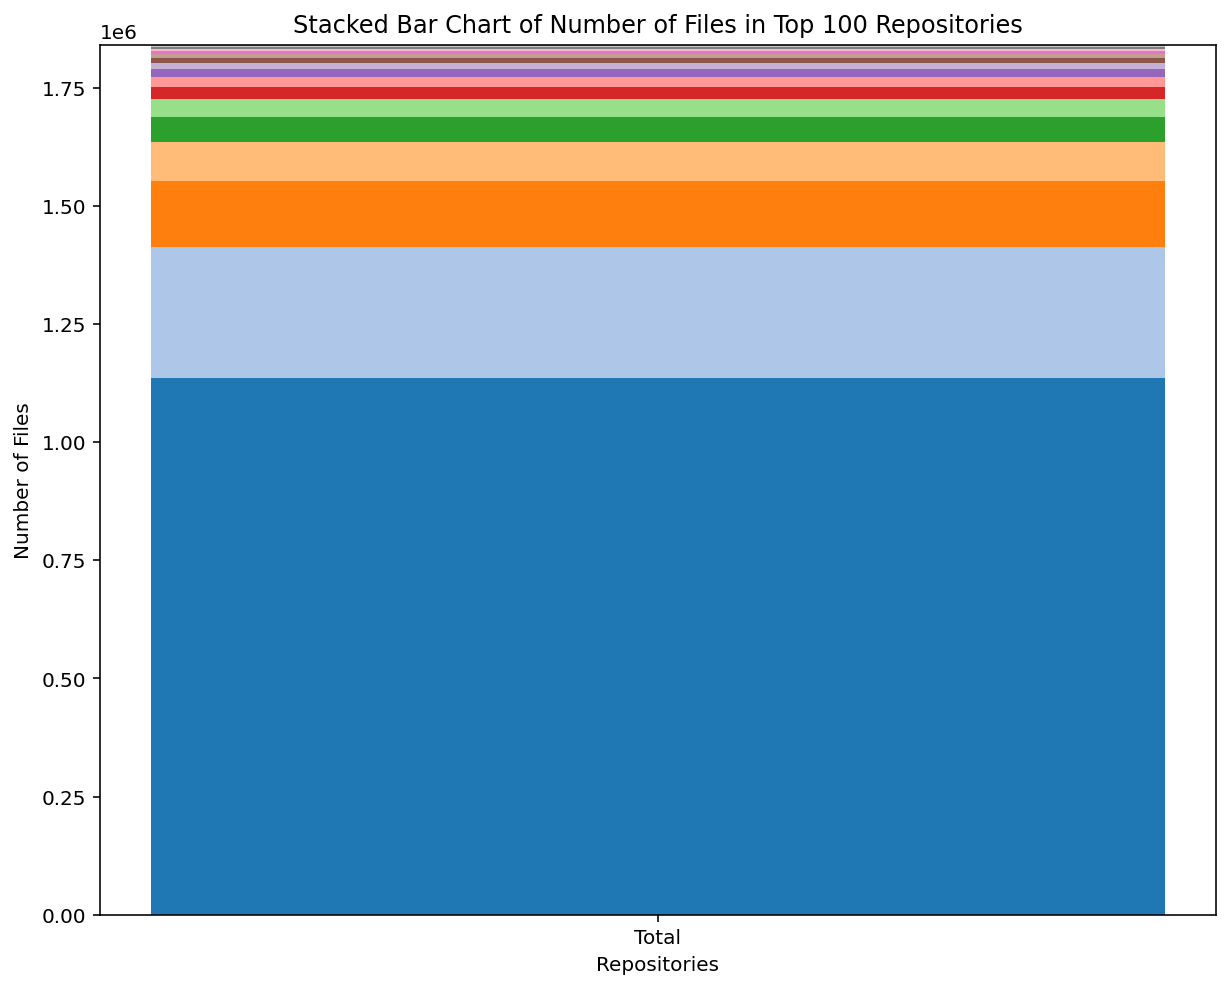

In [87]:
import numpy as np

df_repos_sorted = toprepo.sort_values(by='numFiles', ascending=False)

df_repos_sorted['Cumulative'] = df_repos_sorted['numFiles'].cumsum()

plt.figure(figsize=(10, 8))

bottom_val = np.zeros(len(df_repos_sorted))


color_map = plt.cm.get_cmap('tab20', len(df_repos_sorted))


for i, (index, row) in enumerate(df_repos_sorted.iterrows()):
    plt.bar('Total', row['numFiles'], bottom=bottom_val, color=color_map(i))
    bottom_val += row['numFiles']


plt.title('Stacked Bar Chart of Number of Files in Top 100 Repositories')
plt.xlabel('Repositories')
plt.ylabel('Number of Files')

plt.show()


In [75]:
toprepo

,owner,repo,link,numFiles,time
0,Alexander-MacDonald,test-repo,[('https://api.github.com/repos/Alexander-MacD...,5,2207.161188
1,twbs,bootstrap,[('https://api.github.com/repos/twbs/bootstrap...,745,83008.044720
2,EbookFoundation,free-programming-books,[('https://api.github.com/repos/EbookFoundatio...,210,7441.006660
3,facebook,react,[('https://api.github.com/repos/facebook/react...,2575,332342.858076
4,d3,d3,[('https://api.github.com/repos/d3/d3/contents...,173,19827.651978
...,...,...,...,...,...
973,chrisjenx,Calligraphy,[('https://api.github.com/repos/chrisjenx/Call...,60,16373.378515
974,eliangcs,http-prompt,[('https://api.github.com/repos/eliangcs/http-...,55,5973.908424
975,robertdavidgraham,masscan,[('https://api.github.com/repos/robertdavidgra...,249,7085.832357
976,ElemeFE,mint-ui,[('https://api.github.com/repos/ElemeFE/mint-u...,240,42161.152601


In [59]:
# Sort the DataFrame by the number of files, descending, and select the top 5
toprepo = toprepo.sort_values(by="numFiles", ascending=False).head(200)


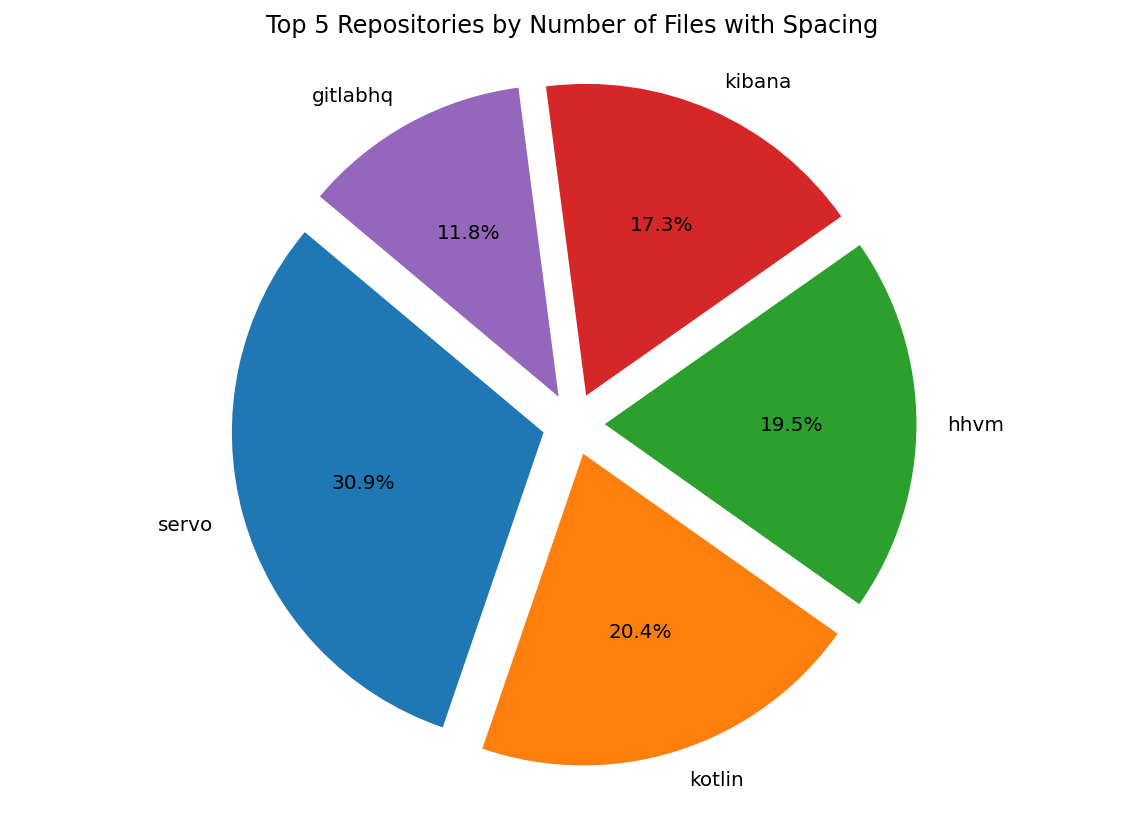

In [55]:
# Define the explode values for each slice to create spacing
explode_values = (0.1, 0.1, 0.1, 0.1, 0.1)  # Small offset for each slice


plt.figure(figsize=(10, 7))
plt.pie(toprepo["numFiles"], labels=toprepo["repo"], autopct='%1.1f%%', startangle=140, explode=explode_values)
plt.title('Top 5 Repositories by Number of Files with Spacing')
plt.axis('equal')  

plt.show()


In [74]:
toprepo

,owner,repo,link,numFiles,time
0,Alexander-MacDonald,test-repo,[('https://api.github.com/repos/Alexander-MacD...,5,2207.161188
1,twbs,bootstrap,[('https://api.github.com/repos/twbs/bootstrap...,745,83008.044720
2,EbookFoundation,free-programming-books,[('https://api.github.com/repos/EbookFoundatio...,210,7441.006660
3,facebook,react,[('https://api.github.com/repos/facebook/react...,2575,332342.858076
4,d3,d3,[('https://api.github.com/repos/d3/d3/contents...,173,19827.651978
...,...,...,...,...,...
973,chrisjenx,Calligraphy,[('https://api.github.com/repos/chrisjenx/Call...,60,16373.378515
974,eliangcs,http-prompt,[('https://api.github.com/repos/eliangcs/http-...,55,5973.908424
975,robertdavidgraham,masscan,[('https://api.github.com/repos/robertdavidgra...,249,7085.832357
976,ElemeFE,mint-ui,[('https://api.github.com/repos/ElemeFE/mint-u...,240,42161.152601


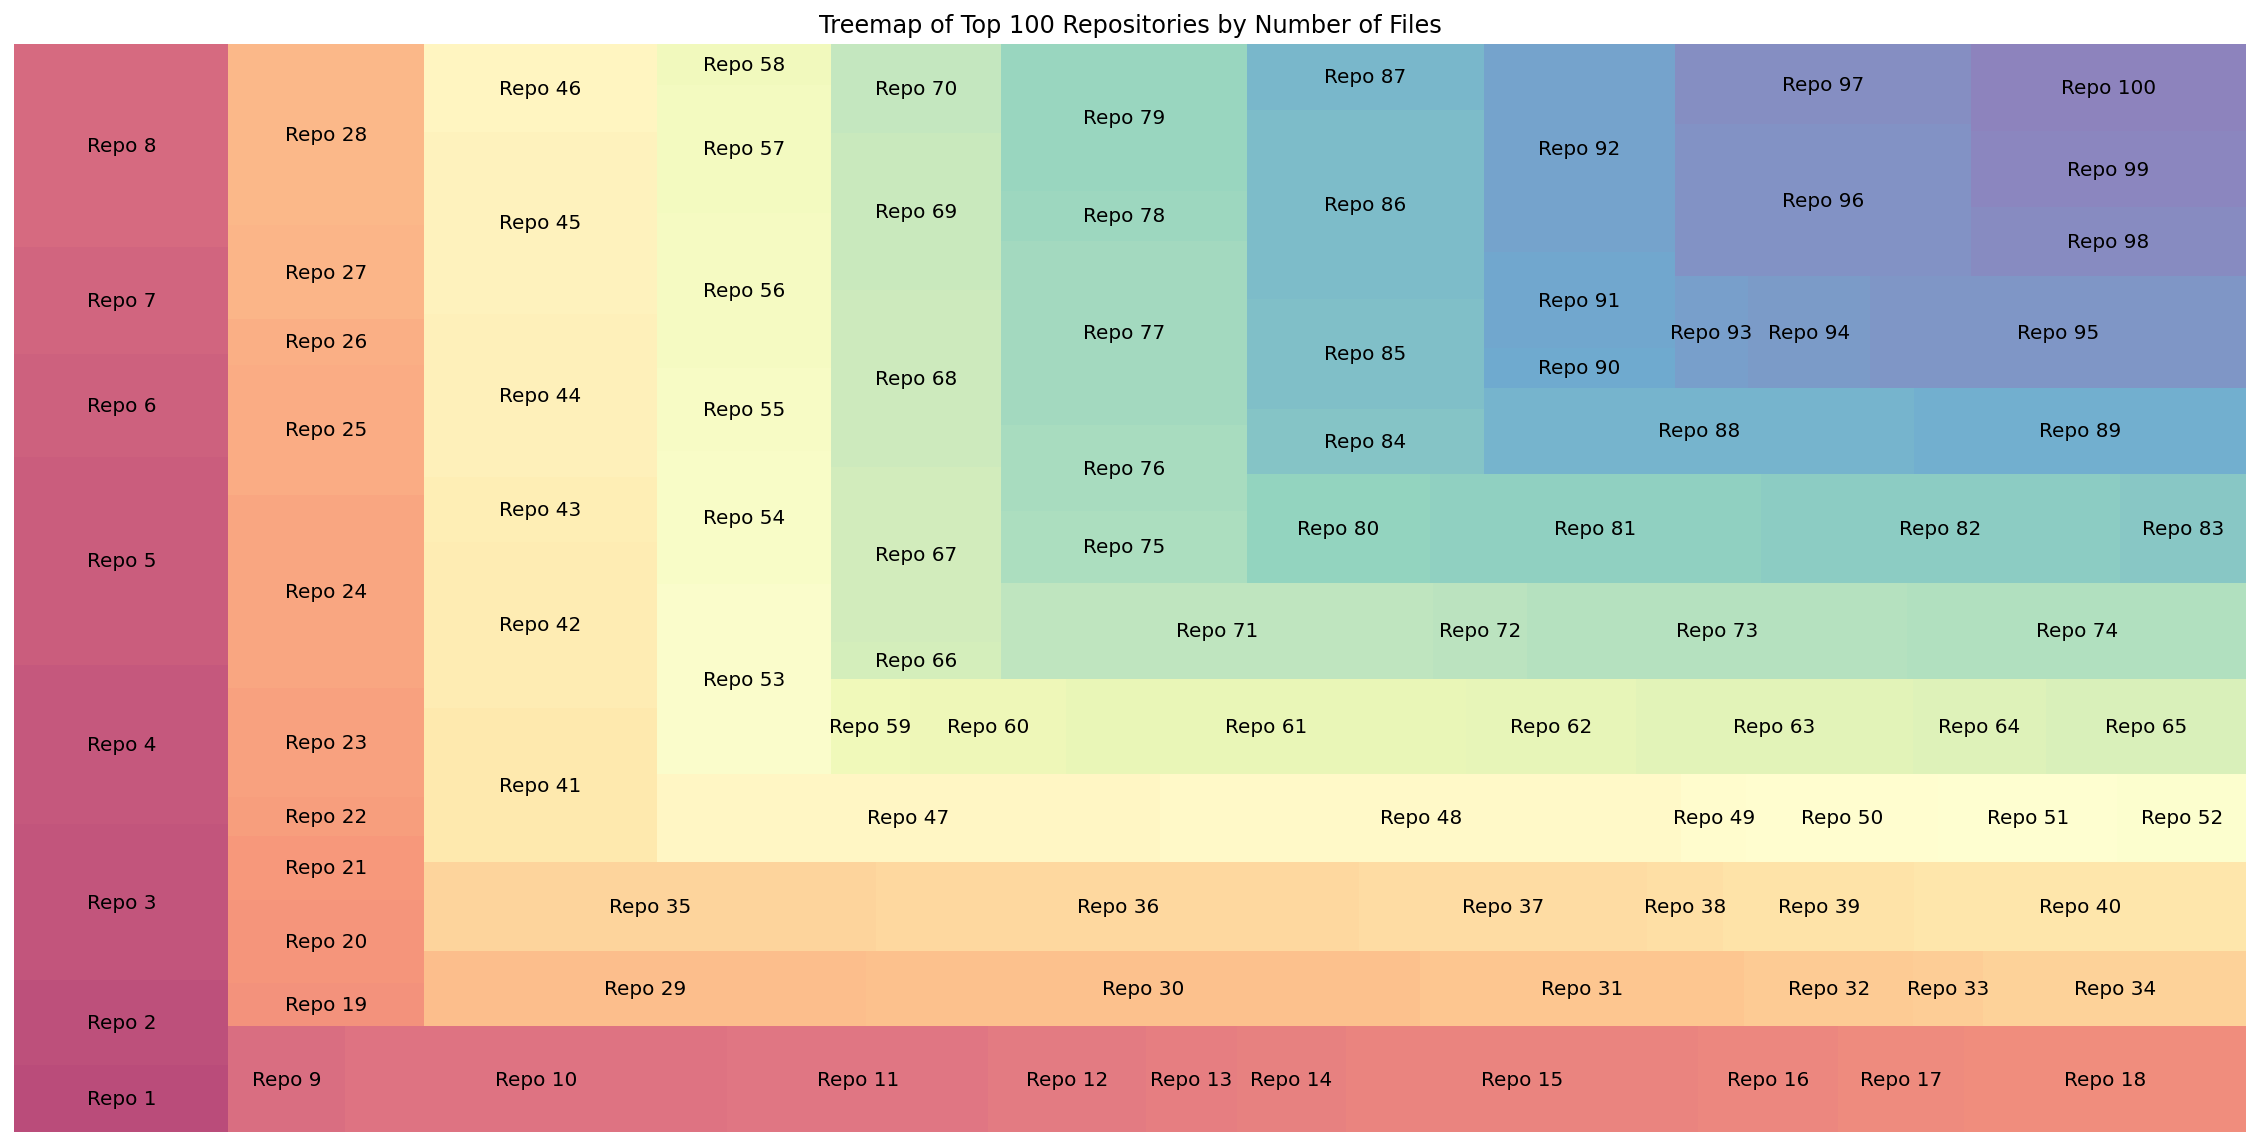

In [73]:
import matplotlib.pyplot as plt
import squarify
import numpy as np


labels = ['Repo ' + str(i) for i in range(1, 101)]   
sizes = [np.random.randint(100, 1000) for _ in range(100)]   
 
color_list = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

 
plt.figure(figsize=(20, 10))   
squarify.plot(sizes=sizes, label=labels, color=color_list, alpha=0.7)
plt.title('Treemap of Top 100 Repositories by Number of Files')
plt.axis('off')   
plt.show()
